In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df=pd.read_csv('covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26331,26332,05/18/2020,Wyoming,US,2020-05-19 02:32:18,766.0,10.0,0.0
26332,26333,05/18/2020,Xinjiang,Mainland China,2020-05-19 02:32:18,76.0,3.0,73.0
26333,26334,05/18/2020,Yukon,Canada,2020-05-19 02:32:18,11.0,0.0,11.0
26334,26335,05/18/2020,Yunnan,Mainland China,2020-05-19 02:32:18,185.0,2.0,183.0


In [7]:
df. shape

(26336, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26336 entries, 0 to 26335
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              26336 non-null  int64  
 1   ObservationDate  26336 non-null  object 
 2   Province/State   12686 non-null  object 
 3   Country/Region   26336 non-null  object 
 4   Last Update      26336 non-null  object 
 5   Confirmed        26336 non-null  float64
 6   Deaths           26336 non-null  float64
 7   Recovered        26336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [14]:
from datetime import date


china=df.loc[df['Country/Region']=='Mainland China']
china['date'] = china['ObservationDate'].dt.date
china['date']=pd.to_datetime(china['date'])
china = china[china['date'] > pd.Timestamp(date(2020,1,21))]
china = china[china['date'] < pd.Timestamp(date(2020,2,18))]
china=china.groupby('date')["Confirmed", "Recovered", "Deaths"].sum().reset_index()
china

,date,Confirmed,Recovered,Deaths
0,2020-01-22,547,28,17
1,2020-01-23,639,30,18
2,2020-01-24,916,36,26
3,2020-01-25,1399,39,42
4,2020-01-26,2062,49,56
5,2020-01-27,2863,58,82
6,2020-01-28,5494,101,131
7,2020-01-29,6070,120,133
8,2020-01-30,8124,135,171
9,2020-01-31,9783,214,213


In [15]:
china['new cases'] = china['Confirmed'].sub(china['Confirmed'].shift())
china['new cases'].iloc[0] = china['Confirmed'].iloc[0]
china

,date,Confirmed,Recovered,Deaths,new cases
0,2020-01-22,547,28,17,547.0
1,2020-01-23,639,30,18,92.0
2,2020-01-24,916,36,26,277.0
3,2020-01-25,1399,39,42,483.0
4,2020-01-26,2062,49,56,663.0
5,2020-01-27,2863,58,82,801.0
6,2020-01-28,5494,101,131,2631.0
7,2020-01-29,6070,120,133,576.0
8,2020-01-30,8124,135,171,2054.0
9,2020-01-31,9783,214,213,1659.0


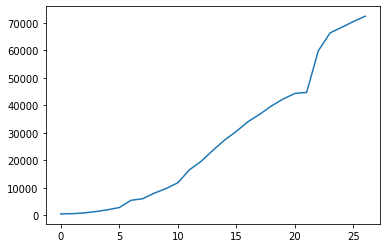

In [17]:
plt.plot(china['Confirmed'], china['new cases'])

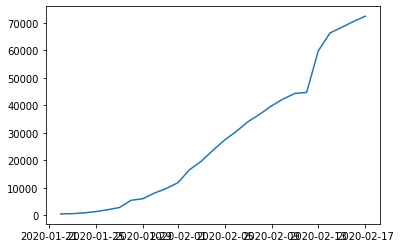

In [20]:
plt.plot(china['date'], china['Confirmed'])

In [51]:
day=np.arange(0, len(china), 1)
day, len(china)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 27)

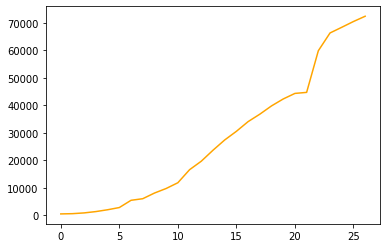

In [52]:
plt.plot(day, china['Confirmed'], color='orange')

In [53]:
from sklearn.linear_model import LinearRegression

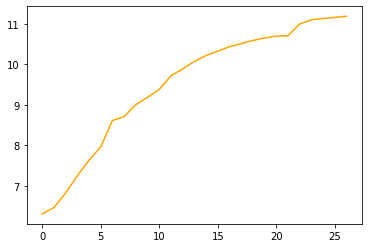

In [54]:
plt.plot(day, np.log(china['Confirmed']), color='orange')

In [55]:
X, Y= day.reshape(-1, 1), np.log(china['Confirmed'])
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

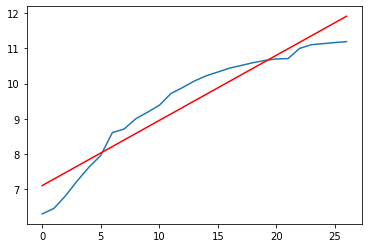

In [56]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

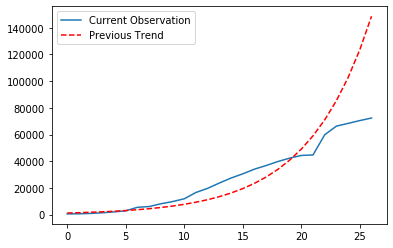

In [57]:
plt.plot(day, china['Confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [58]:
reg.score(X, Y)

0.9081550155303448

In [61]:
test=np.arange(-71, 0, 1)
test

array([-71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59,
       -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46,
       -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33,
       -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
       -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1])

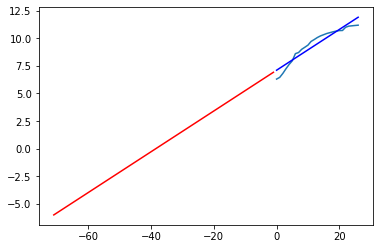

In [66]:
plt.plot(day, np.log(china['Confirmed']))
Y_pred=reg.predict(X)
plt.plot(X, Y_pred, color='blue')
plt.plot(test, reg.predict(test.reshape(-1, 1)), color='red')

In [67]:
predictions=reg.predict(test.reshape(-1, 1))
test, predictions

(array([-71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59,
        -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46,
        -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33,
        -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
        -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
         -6,  -5,  -4,  -3,  -2,  -1]),
 array([-6.00304918, -5.81839042, -5.63373165, -5.44907288, -5.26441412,
        -5.07975535, -4.89509659, -4.71043782, -4.52577906, -4.34112029,
        -4.15646153, -3.97180276, -3.787144  , -3.60248523, -3.41782647,
        -3.2331677 , -3.04850893, -2.86385017, -2.6791914 , -2.49453264,
        -2.30987387, -2.12521511, -1.94055634, -1.75589758, -1.57123881,
        -1.38658005, -1.20192128, -1.01726252, -0.83260375, -0.64794499,
        -0.46328622, -0.27862745, -0.09396869,  0.09069008,  0.27534884,
         0.46000761,  0.64466637,  0.82932514,  1.0139839 ,  1.19864267,
         1.